## Finding Heavy Traffic Indicators
In this project we will be examining a dataset about the westbound traffic on the I-94 Interstate Highway. The dataset comes from the UCI Machine Learning Repository.

The goal of this analysis is to determine a few indicators of heavy traffic on the I-94. These indicators can be weather type, time of day, time of week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [27]:
import pandas as pd
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#examine the first five rows of data
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [28]:
#examine the last five rows of data
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


## Analyzing the data

In [30]:
#find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


As you can see, we have 48,000+ rows of rata. Each row contains 9 different columns of data of types int, float, and object/string. According to the dataset documentation, a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

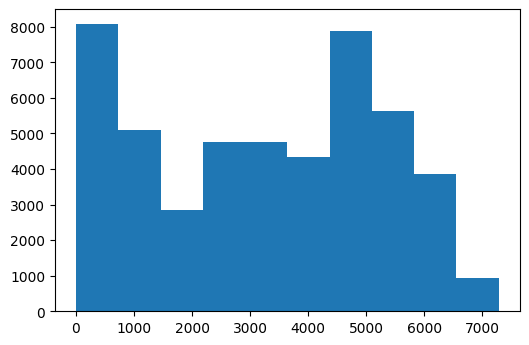

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['traffic_volume'])
plt.show()

In [4]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the histogram above, as well as the description of our dataframe, we can make some simple observations. First, the histogram has to big spikes, then slowly falls off. This could be the big rush of traffic in the morning and afternoon, when people are travelling to and from work.

Next, we can see that the I-94 had, on average, about 3,260 cars per hour, with a maximum of 7,280, probably during rush hour. About 25% of the time, there are around 1,193 cars on the road, while another 25% of the time, there are more than four times that amound at 4,933. So this gives us an interesting point to think about: daytime data vs. nighttime data.

## Day vs. Night
We will proceed by dividing our dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this isn't a perfect criterion, it gives us a good starting point.

In [6]:
#converts our date-time data to the proper data type
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [7]:
#split up our data into daytime
daytime = df.copy()[(df['date_time'].dt.hour >= 7) &
                         (df['date_time'].dt.hour < 19)]
#and nighttime
nighttime = df.copy()[(df['date_time'].dt.hour >= 19) |
                           (df['date_time'].dt.hour < 7)]

#examine the shape
print('Daytime:',daytime.shape)
print('Nighttime:',nighttime.shape)

Daytime: (23877, 9)
Nighttime: (24327, 9)


In [8]:
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


As you can see, the daytime data does not have an equal amount of data compared to the nighttime data. This could be caused by missing data, or just variations in traffic

## Traffic Volume: Day vs. Night

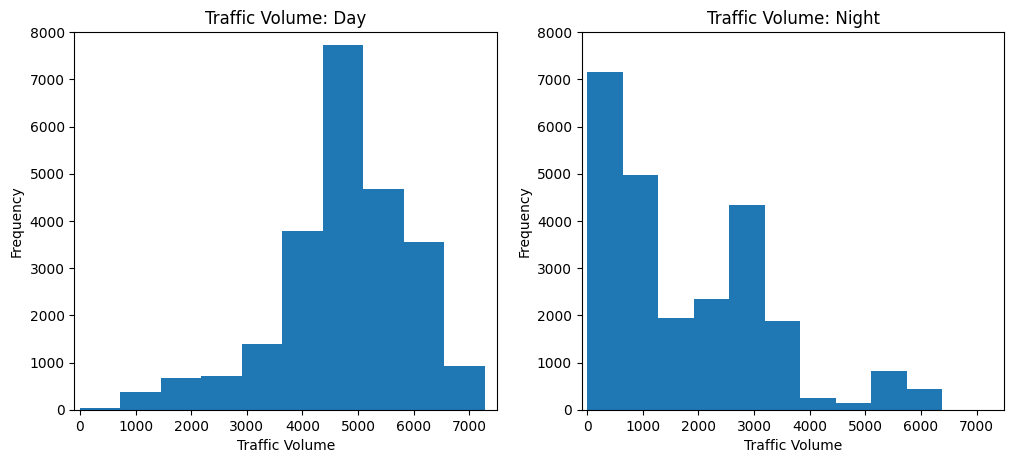

In [9]:
#overall size of grid chart
plt.figure(figsize=(12, 5))

#daytime plot
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100,7500) #horizontal limit
plt.ylim(0,8000)    #vertical limit
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

#nighttime plot
plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100,7500) #horizontal limit
plt.ylim(0,8000)    #vertical limit
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [10]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [16]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

We can see from our histograms above, as well as the results of our describe() functions, that on average, the daytime has significantly more cars heading westbound than the nighttime. The average number of cars during the day is 4,762, while at night it's 1,785. This makes sense, as more people probably work throughout the day than they do at night. During the day, 25% of the time there's 5,559 cars, while at night there's only 2,819.

The daytime histogram is left skewed, as most of the time the traffic volume values are rather high. The nighttime histogram is right skewed, as most of the traffic volume values are rather low. For example, during the day, 25% of the time there are more than 4,252 cars, while at night, 75% of the time there are fewer than 2,819 cars.

Since our goal is to help identify heavy traffic indicators, we should only focus on times that have heavy traffic. For this purpose, we will only be looking at the daytime data.

## Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

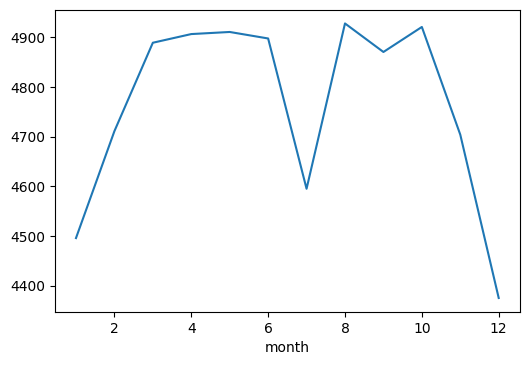

In [17]:
by_month['traffic_volume'].plot.line()
plt.show()

We see an interesting graph here. It seems that in the winter months, namely November through February, traffic decreases quite a bit. Also, in July it seems to see a very similar dip. What is so special about July? Let's examine it further.

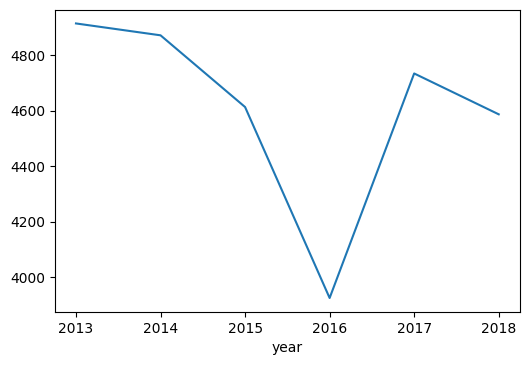

In [31]:
#create a new column for the year when the measurement was taken
daytime['year'] = daytime['date_time'].dt.year

#only take the month of july
july = daytime[daytime['month'] == 7]

#take all the julys and find the mean traffic volume
july_mean = july.groupby('year').mean()

#plot
july_mean['traffic_volume'].plot.line()
plt.show()

We can see from our graph that the traffic in July is actually quite normal, except for 2016. This might be due to some natural disaster, or planned construction phase that limited or closed off a part of the I-94. A quick google search shows that in July 2016, there was also some incident involving a group of protestors that caused it to be shut down. However, since the majority of traffic was down throughout the entire month of July, it's more likely to have been caused by something more long term, like construction.

## Time Indicators (Part 2)
We'll now continue with building line plots for another time unit: day of the week.

In [18]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

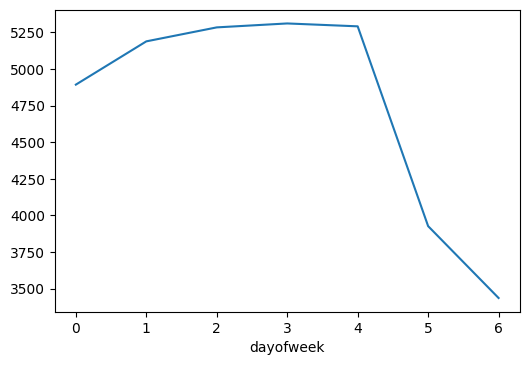

In [19]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Here we can see a nice pattern that lines up with what we'd expect. The I-94 had relatively high daytime traffic Monday-Friday, and then significantly less traffic on the weekends. People like to rest and stay in on weekends, which could be one reason for the significant drop.

## Time Indicators (Part 3)
Now were going to examine our data even further. We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [21]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


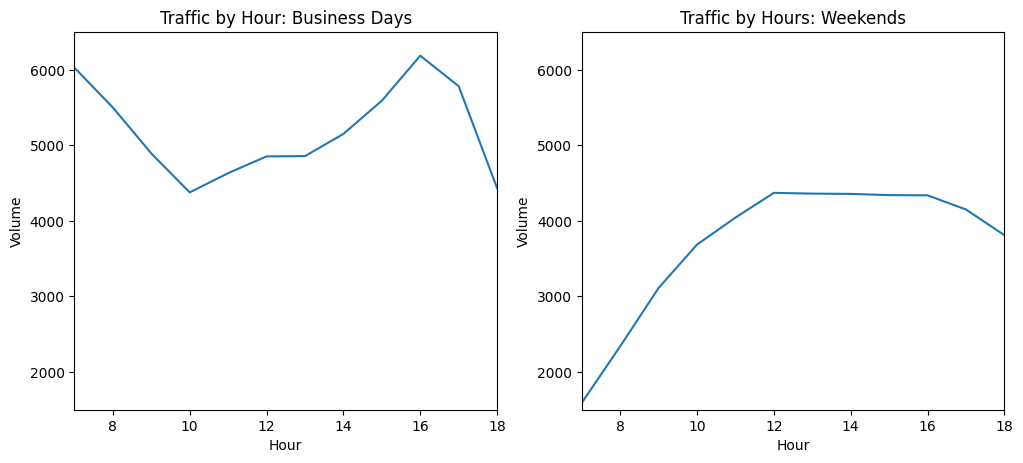

In [22]:
#overall size of grid chart
plt.figure(figsize=(12, 5))

#business day plot
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(7,18) #horizontal limit
plt.ylim(1500,6500)    #vertical limit
plt.title('Traffic by Hour: Business Days')
plt.xlabel('Hour')
plt.ylabel('Volume')

#weekend plot
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(7,18) #horizontal limit
plt.ylim(1500,6500)    #vertical limit
plt.title('Traffic by Hours: Weekends')
plt.xlabel('Hour')
plt.ylabel('Volume')

plt.show()

From the graphs above, we can easily see that during business days, there are two big spikes around 7am and 4pm (aka, rush hour). These are the hours when most people are trying to get to/from work. Even outside these hours, during business days at every single hour, the traffic volume is higher than that of weekends. Also of interesting note, is that on weekends we can see a very gradual increase in traffic during the early hours of the day, notably from 7-9am - this is most likely because people are still waking up and relaxing and enjoying themselves.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7am and 4pm.

## Traffic vs. Weather
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [23]:
#finds the Pearson r's between 
corr = daytime.corr()['traffic_volume']
corr

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see above that the weather-related column with the strongest correlation to our traffic_volume column is temp, with a positive correlation of about 0.13. If we make a scatter plot between traffic_volume and temp, we get the following:

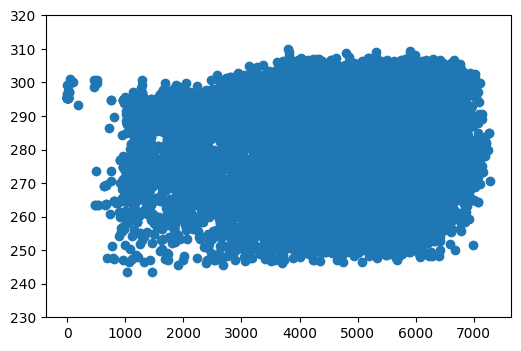

In [24]:
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

It's quite clear from our scatter plot that there is no discernible connection between temperature and traffic volume. Let's take a look at the other two weather columns: weather_main and weather_description.

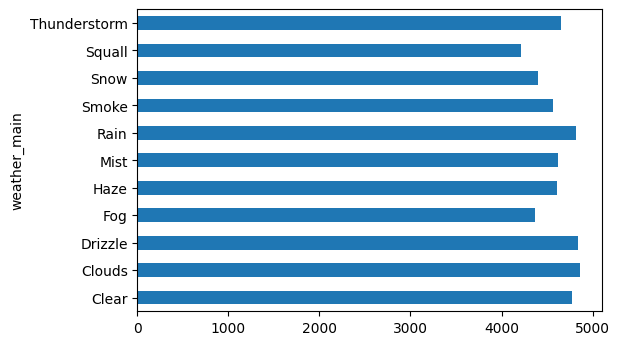

In [25]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh() # Horizontal bar plot
plt.show()

It doesn't seem like there's any connection between traffic volume and weather type. They all fall between the 4,000-5,000 car range. Let's look at the more granular weather description.

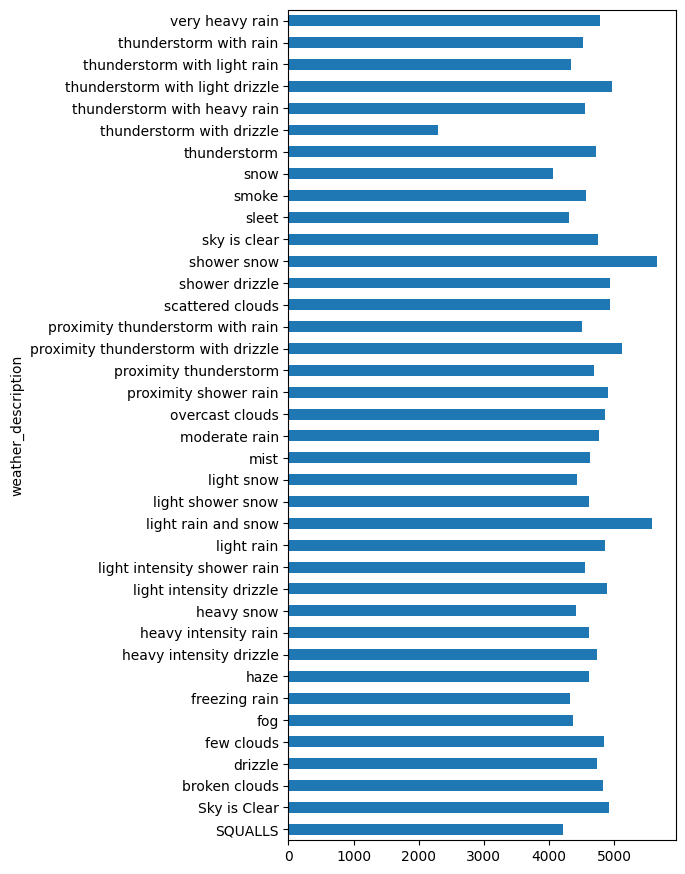

In [26]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,11)) # Horizontal bar plot
plt.show()

It looks like there are three weather descriptions that cause traffic volume to exceed 5,000:

- shower snow
- proximity thunderstorm with drizzle
- light rain and snow
It's not clear why these specific weather types cause more traffic. 
Even though they exceed 5,000, they aren't that far ahead of the other weather types. It's bad weather, but not terrible weather.

## Nighttime Analysis
Now that we've analyzed the daytime, let's look at the nighttime data just to see if there are any interesting points. To help simplify, we will create all the same columns we did for the daytime data.

### Nighttime Time Indicators - (Part 1)
We'll start by adding the month column, and looking at the traffic volume by month.

In [32]:
#creates a new column in our nighttime data for month
nighttime['month'] = nighttime['date_time'].dt.month

#group the dataset by the new month column, and calculate the mean
by_month_n = nighttime.groupby('month').mean()

#display the average traffic volume per month
by_month_n['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

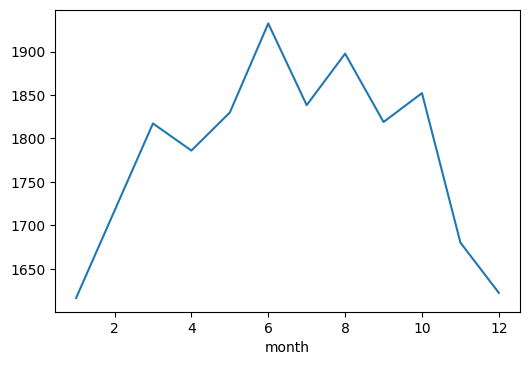

In [33]:
#create plot line graph of above data
by_month_n['traffic_volume'].plot.line()
plt.show()

We can see a fairly similar graph to the daytime data - traffic drops off significantly during the winter months of November - February. It peaks in the early summer months with around 1,932 cars. Let's examine the average pear year as well.

In [35]:
#creates a new column in our nighttime data for month
nighttime['year'] = nighttime['date_time'].dt.year

#group the dataset by the new month column, and calculate the mean
by_year_n = nighttime.groupby('year').mean()

#display the average traffic volume per month
by_year_n['traffic_volume']

year
2012    1678.183559
2013    1776.179115
2014    1762.013115
2015    1793.439856
2016    1739.358719
2017    1857.150670
2018    1796.524133
Name: traffic_volume, dtype: float64

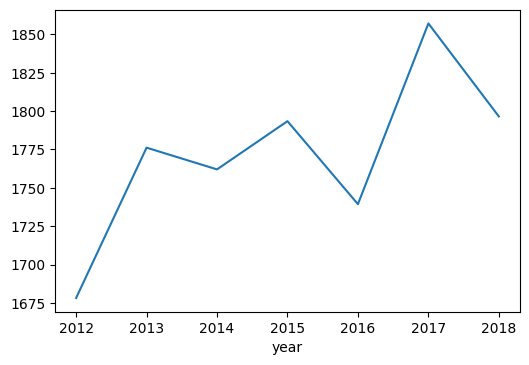

In [36]:
#create plot line graph of above data
by_year_n['traffic_volume'].plot.line()
plt.show()

## Nighttime Indicators (Part 2)
Let's look at day of the week now.

In [37]:
#create a new column for the day of the week when the measurement was taken
nighttime['dayofweek'] = nighttime['date_time'].dt.dayofweek

#group the dataset by the new dayofweek column, and calculate the mean
by_dayofweek_n = nighttime.groupby('dayofweek').mean()

#display the average traffic volume for each day of the week
#0 - Monday, 6 - Sunday
by_dayofweek_n['traffic_volume']

dayofweek
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

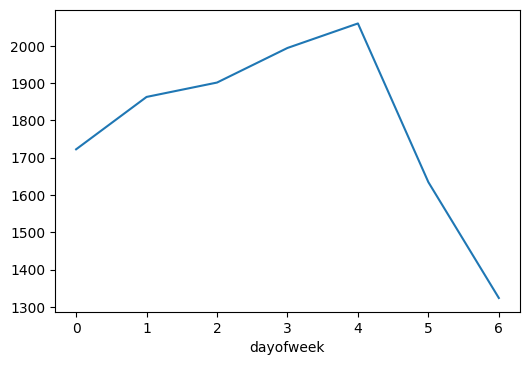

In [38]:
#create plot line graph of above data
by_dayofweek_n['traffic_volume'].plot.line()
plt.show()

Also a bit interesting, as we see an increase in traffic at night throughout the work week, and then a big dropoff during the weekend. Perhaps people are working slightly longer each day of the week, which would postpone when people go home from work?

## Nighttime Indicators - (Part 3)
Now we're going to look at the traffic per hour, and similar to last time, we'll split the data into business days and weekends.

In [39]:
#create a new column for the hour of the day when the measurement was taken
nighttime['hour'] = nighttime['date_time'].dt.hour

#splits into two DataFrames to make it easier to plot by hour
nighttime1 = nighttime.copy()[(nighttime['date_time'].dt.hour < 7)]
nighttime2 = nighttime.copy()[(nighttime['date_time'].dt.hour >= 19)]

#next two sections are for the hours of 0-7
#split into business days
business_days_n1 = nighttime1.copy()[nighttime1['dayofweek'] <= 4] # 4 == Friday
by_hour_business_n1 = business_days_n1.groupby('hour').mean()
print(by_hour_business_n1['traffic_volume'])

#split into weekends
weekend_n1 = nighttime1.copy()[nighttime1['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekend_n1 = weekend_n1.groupby('hour').mean()
print(by_hour_weekend_n1['traffic_volume'])

#next two sections are for the hours of 19-23
#split into business days
business_days_n2 = nighttime2.copy()[nighttime2['dayofweek'] <= 4] # 4 == Friday
by_hour_business_n2 = business_days_n2.groupby('hour').mean()
print(by_hour_business_n2['traffic_volume'])

#split into weekends
weekend_n2 = nighttime2.copy()[nighttime2['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekend_n2 = weekend_n2.groupby('hour').mean()
print(by_hour_weekend_n2['traffic_volume'])

hour
0     651.528971
1     396.913043
2     301.982818
3     362.289835
4     832.661096
5    2701.296703
6    5365.983210
Name: traffic_volume, dtype: float64
hour
0    1306.414035
1     805.128333
2     611.171986
3     393.611599
4     375.420168
5     639.237232
6    1089.100334
Name: traffic_volume, dtype: float64
hour
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


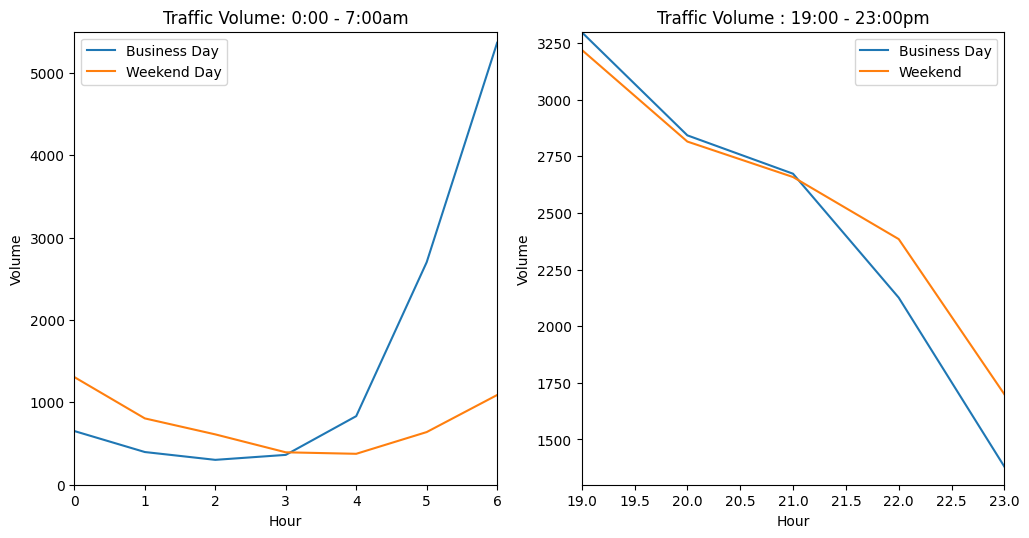

In [40]:
#create 1x2 grid chart. Two graphs for business days, two for weekends
#overall size of grid chart
plt.figure(figsize=(12, 6))

#TO RECAP:
#by_hour_business_n1 = 0:00 - 7:00 am
#by_hour_weekend_n1  = 0:00 - 7:00 am

#by_hour_business_n2 = 19:00 - 23:00 pm
#by_hour_weekend_n2  = 19:00 - 23:00 pm

#0:00 - 7:00am (both business days and weekends)
#business day
plt.subplot(1, 2, 1)
plt.plot(by_hour_business_n1['traffic_volume'],label='Business Day')
plt.xlim(0,6) #horizontal limit
plt.ylim(0,5500)    #vertical limit
plt.title('Traffic Volume: 0:00 - 7:00am')
plt.xlabel('Hour')
plt.ylabel('Volume')

#weekend
plt.plot(by_hour_weekend_n1['traffic_volume'],label='Weekend Day')
plt.xlim(0,6) #horizontal limit
plt.ylim(0,5500)    #vertical limit
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.legend() #shows legend for first graph

#19:00 - 23:00pm (both business days and weekends)
#business day
plt.subplot(1, 2, 2)
plt.plot(by_hour_business_n2['traffic_volume'],label='Business Day')
plt.xlim(19,23) #horizontal limit
plt.ylim(1300,3300)    #vertical limit
plt.title('Traffic Volume : 19:00 - 23:00pm')
plt.xlabel('Hour')
plt.ylabel('Volume')

#weekend
plt.plot(by_hour_weekend_n2['traffic_volume'],label='Weekend')
plt.xlim(19,23) #horizontal limit
plt.ylim(1300,3300)    #vertical limit
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.legend() #shows legend for second graph

plt.show() #displays our lovely graphs

There's a couple things we can point out from the above graphs. First, the nighttime traffic on weekends from the hours of 0:00 - 7:00am is significantly lower than that during the week, presumably because people aren't waking up that early for work. The hours of 4:00 - 6:00am see a big increase during the week presumably because people are all heading to work during the same time.

From the hours of 19:00 - 23:00pm, there is only a minor increase in traffic from about 21:00 - 23:00, presumably because people are still enjoying their weekend activities. We also see a steady decrease during these hours because less people are driving after a day of work or activities.

## Nighttime Traffic vs. Weather
We've examined the daytime traffic patterns against the weather. Let's now try the same thing with the nighttime data. Let's first quickly check to see if there are any strong correlations in our dataset.

In [41]:
corr_n = nighttime.corr()['traffic_volume']
corr_n

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
month             0.001342
year              0.018544
dayofweek        -0.073636
hour              0.454586
Name: traffic_volume, dtype: float64

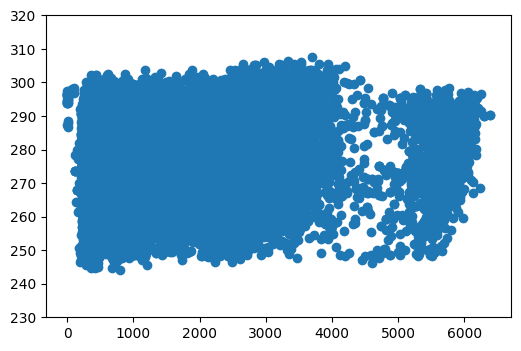

In [42]:
plt.scatter(nighttime['traffic_volume'],nighttime['temp'])
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

Similar to our daytime data, there isn't really any connection between the two. Now let's examine the other two weather-related columns: weather_main, and weather_description.

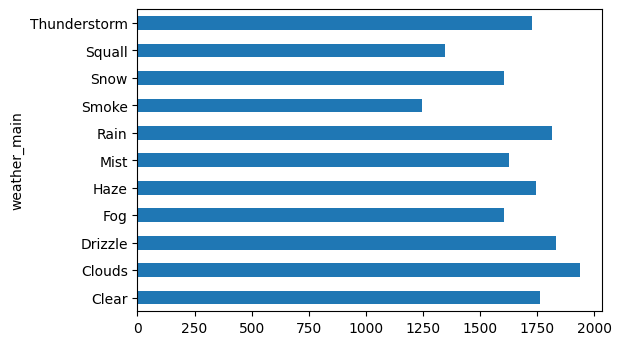

In [43]:
by_weather_main_n = nighttime.groupby('weather_main').mean()
by_weather_description_n = nighttime.groupby('weather_description').mean()

by_weather_main_n['traffic_volume'].plot.barh() # Horizontal bar plot
plt.show()

Again, similar to our daytime data, there is nothing too obvious that is a clear cause of heavy traffic. Let's examine the weather descriptions next.

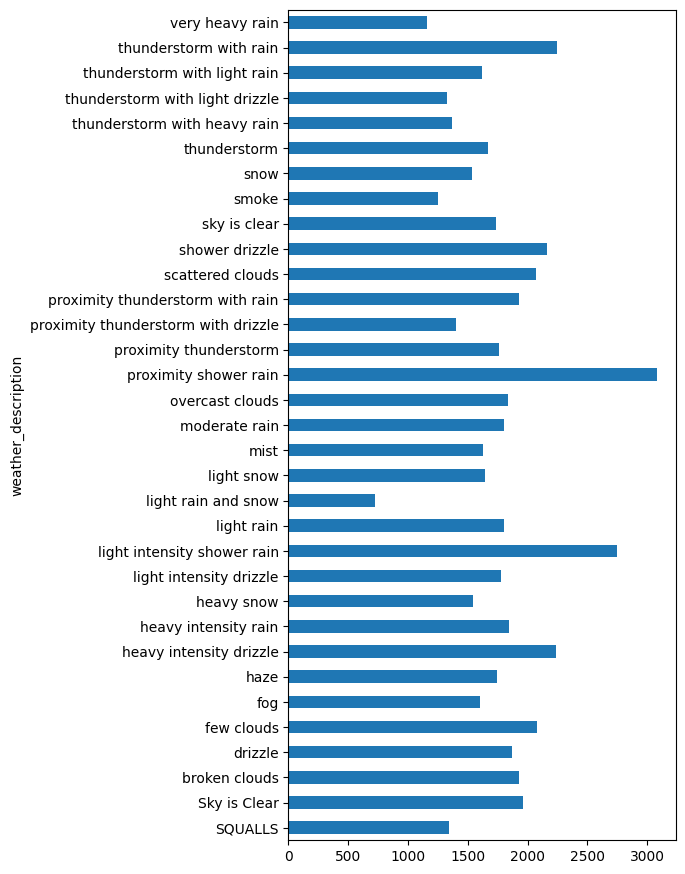

In [44]:
by_weather_description_n['traffic_volume'].plot.barh(figsize=(5,11)) # Horizontal bar plot
plt.show()

Here we can definitely see that there are two weather descriptions that cause traffic volume to exceed 2,500:

- proximity shower with rain
- light intensity shower rain

Compared to the other weather descriptions, these two cause the biggest increase in traffic volume, though it's not entirely clear why, because neither of those weather conditions are particularly severe. The weather that causes the least amount of traffic volume however, is light rain and snow, even though light rain and light snow by themselves more than double the traffic volume.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find the following types of indicators:

- Time indicators (daytime)
  - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  - The traffic is usually heavier on business days compared to the weekends.
  - On business days, the rush hours are around 7 and 16.
- Weather indicators (daytime)
  - Shower snow
  - Light rain and snow
  - Proximity thunderstorm with drizzle
- Time indicators (nighttime)

  - Similar to the daytime data, the traffic is usually heavier in warmer months (March-October) compared to colder months (November-February).
  - The traffic at night slowly increases throughout the working week, and then drops off on the weekends.
  - The biggest difference is from 0:00-7:00am on weekends compared to business days. No more than 1,300 cars are on the road during these hours.
- Weather indicators (nighttime)

  - Proximity shower with rain
  - Light intensity shower rain